# 1. Loading the Data:

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Loading the Data
file_path = r"C:\Users\DEB\Downloads\housing_data.csv"
housing_data = pd.read_csv(file_path)

# Display the first few rows 
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [4]:
# DataFrame info
print("\nDataFrame Info:")
housing_data.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

# 2. Cleaning the Data:

In [6]:
# DataFrame for missing values
missing_values_df = pd.DataFrame({
    'Column': housing_data.columns,
    'Missing Values': housing_data.isnull().sum()
})

# Filter to show only columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print("\nMissing Values:")
print(missing_values_df)

# Duplicates
print(f"\nDuplicates: {housing_data.duplicated().sum()}")


Missing Values:
                  Column  Missing Values
Alley              Alley            1369
MasVnrType    MasVnrType             872
Electrical    Electrical               1
GarageYrBlt  GarageYrBlt              81

Duplicates: 0


In [7]:
import warnings
warnings.filterwarnings("ignore")

# Dropping 'Unnamed: 0', 'Alley' and 'MasVnrType' columns
housing_data.drop(columns=['Unnamed: 0', 'Alley', 'MasVnrType'], inplace=True)

# Filling missing values in 'Electrical' with the mode
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)

In [8]:
# Checking for missing values and column names with missing values
missing_columns = housing_data.columns[housing_data.isnull().any()]

# Columns with missing values
print("\nColumns with Missing Values:")
print(missing_columns)


Columns with Missing Values:
Index(['GarageYrBlt'], dtype='object')


# Insights on Missing Values Handling:

     1. Identified Columns with Missing Values.
     
     2. Actions Taken:
     - Dropped 'Unnamed: 0', 'Alley', and 'MasVnrType' columns due to high missing values.
     - Filled the missing value in 'Electrical' with the most common entry (mode).
     3. Current Status:
     
     - Rechecked for missing values & kept 'GarageYrBlt' as it is needed.

# 3. Univariate Analysis:

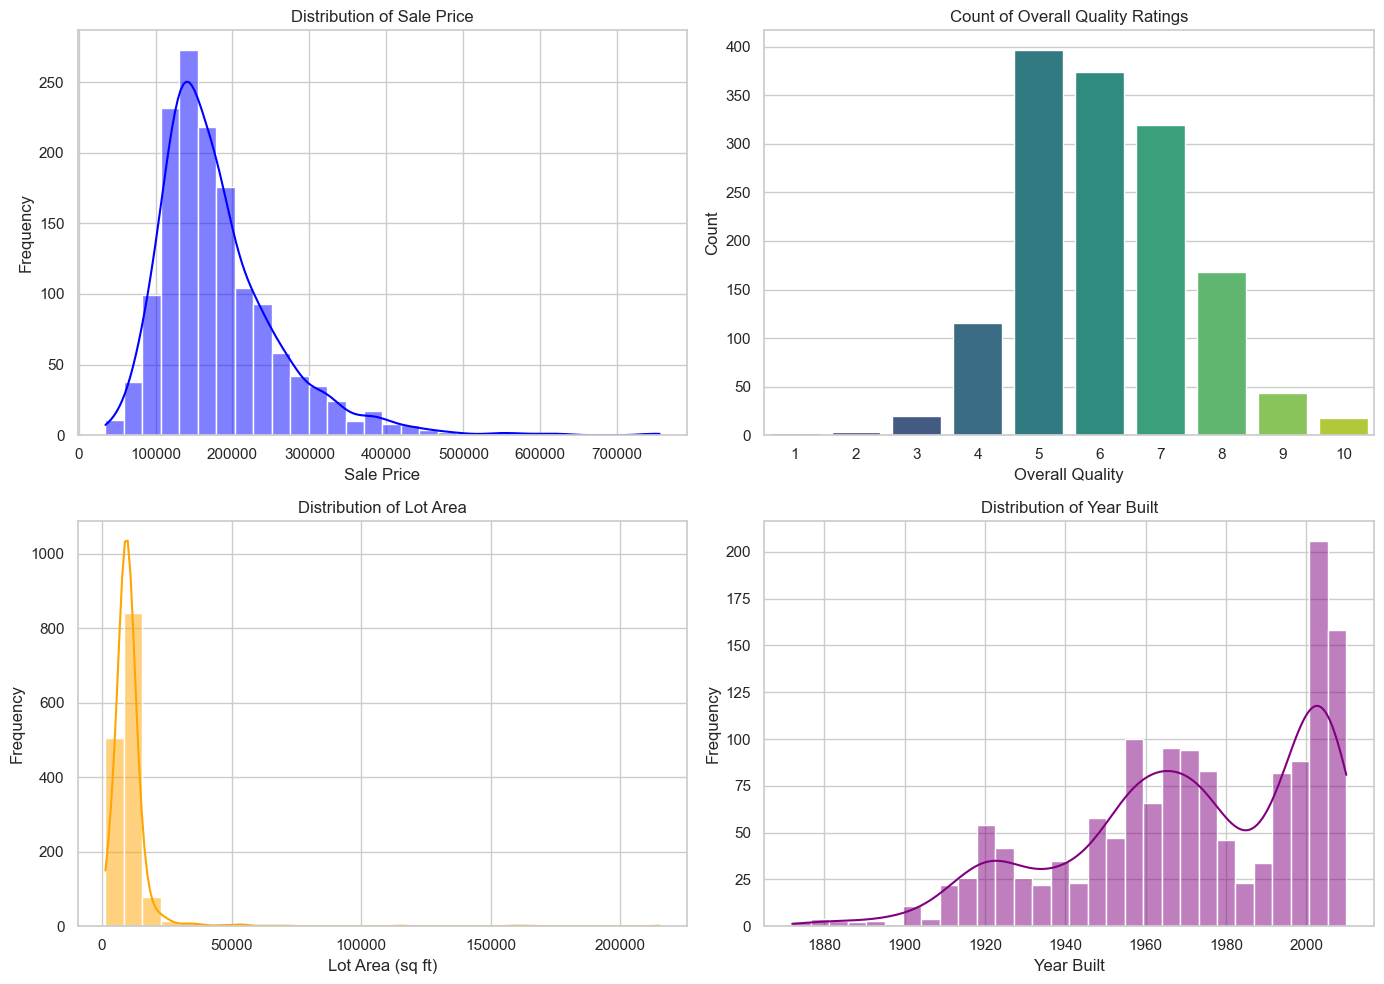

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Sale Price
sns.histplot(housing_data['SalePrice'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sale Price')
axes[0, 0].set_xlabel('Sale Price')
axes[0, 0].set_ylabel('Frequency')

# 2. Count plot for Overall Quality
sns.countplot(data=housing_data, x='OverallQual', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Count of Overall Quality Ratings')
axes[0, 1].set_xlabel('Overall Quality')
axes[0, 1].set_ylabel('Count')

# 3. Distribution of Lot Area
sns.histplot(housing_data['LotArea'], bins=30, kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Lot Area')
axes[1, 0].set_xlabel('Lot Area (sq ft)')
axes[1, 0].set_ylabel('Frequency')

# 4. Distribution of Year Built
sns.histplot(housing_data['YearBuilt'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Year Built')
axes[1, 1].set_xlabel('Year Built')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Insights from Univariate Analysis:

    Sale Price Distribution:
    Concentrated in a specific range with a right skew, indicating a few high-value properties.
    
    Overall Quality Ratings:
    Most properties rated between 5 and 7, with fewer extremes, suggesting moderate quality.
    
    Lot Area Distribution:
    Common lot sizes with some large outliers, indicating variability.
    
    Year Built:
    Peak in mid-20th century construction, with fewer recent builds, suggesting limited new developments.

# 4. Multivariate Analysis:

In [14]:
# Display data types of the relevant columns
relevant_columns = ['SalePrice', 'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt']

print(housing_data[relevant_columns].dtypes)

SalePrice      int64
GrLivArea      int64
OverallQual    int64
LotArea        int64
YearBuilt      int64
dtype: object


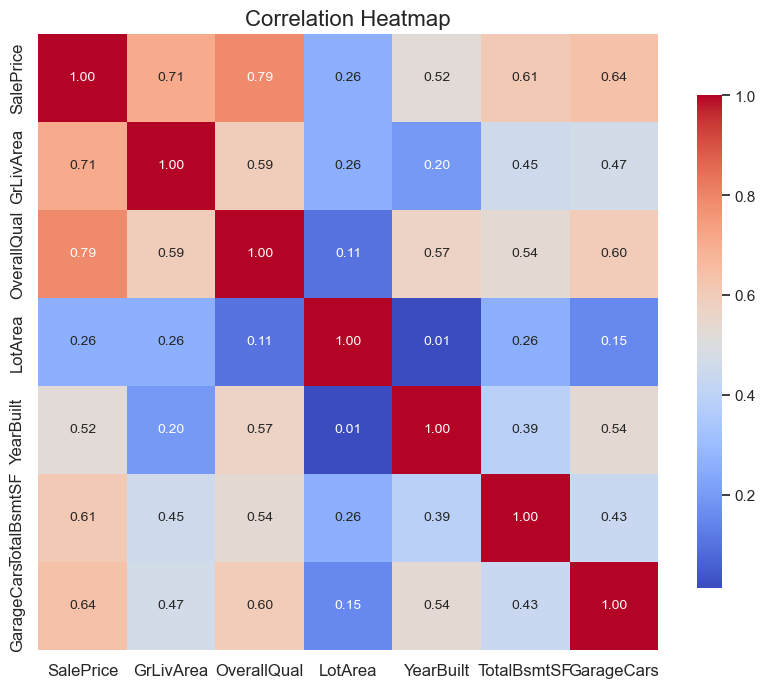

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant columns for analysis
columns_of_interest = ['SalePrice', 'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars']
filtered_data = housing_data[columns_of_interest]

# Correlation matrix
correlation_matrix = filtered_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 10}, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

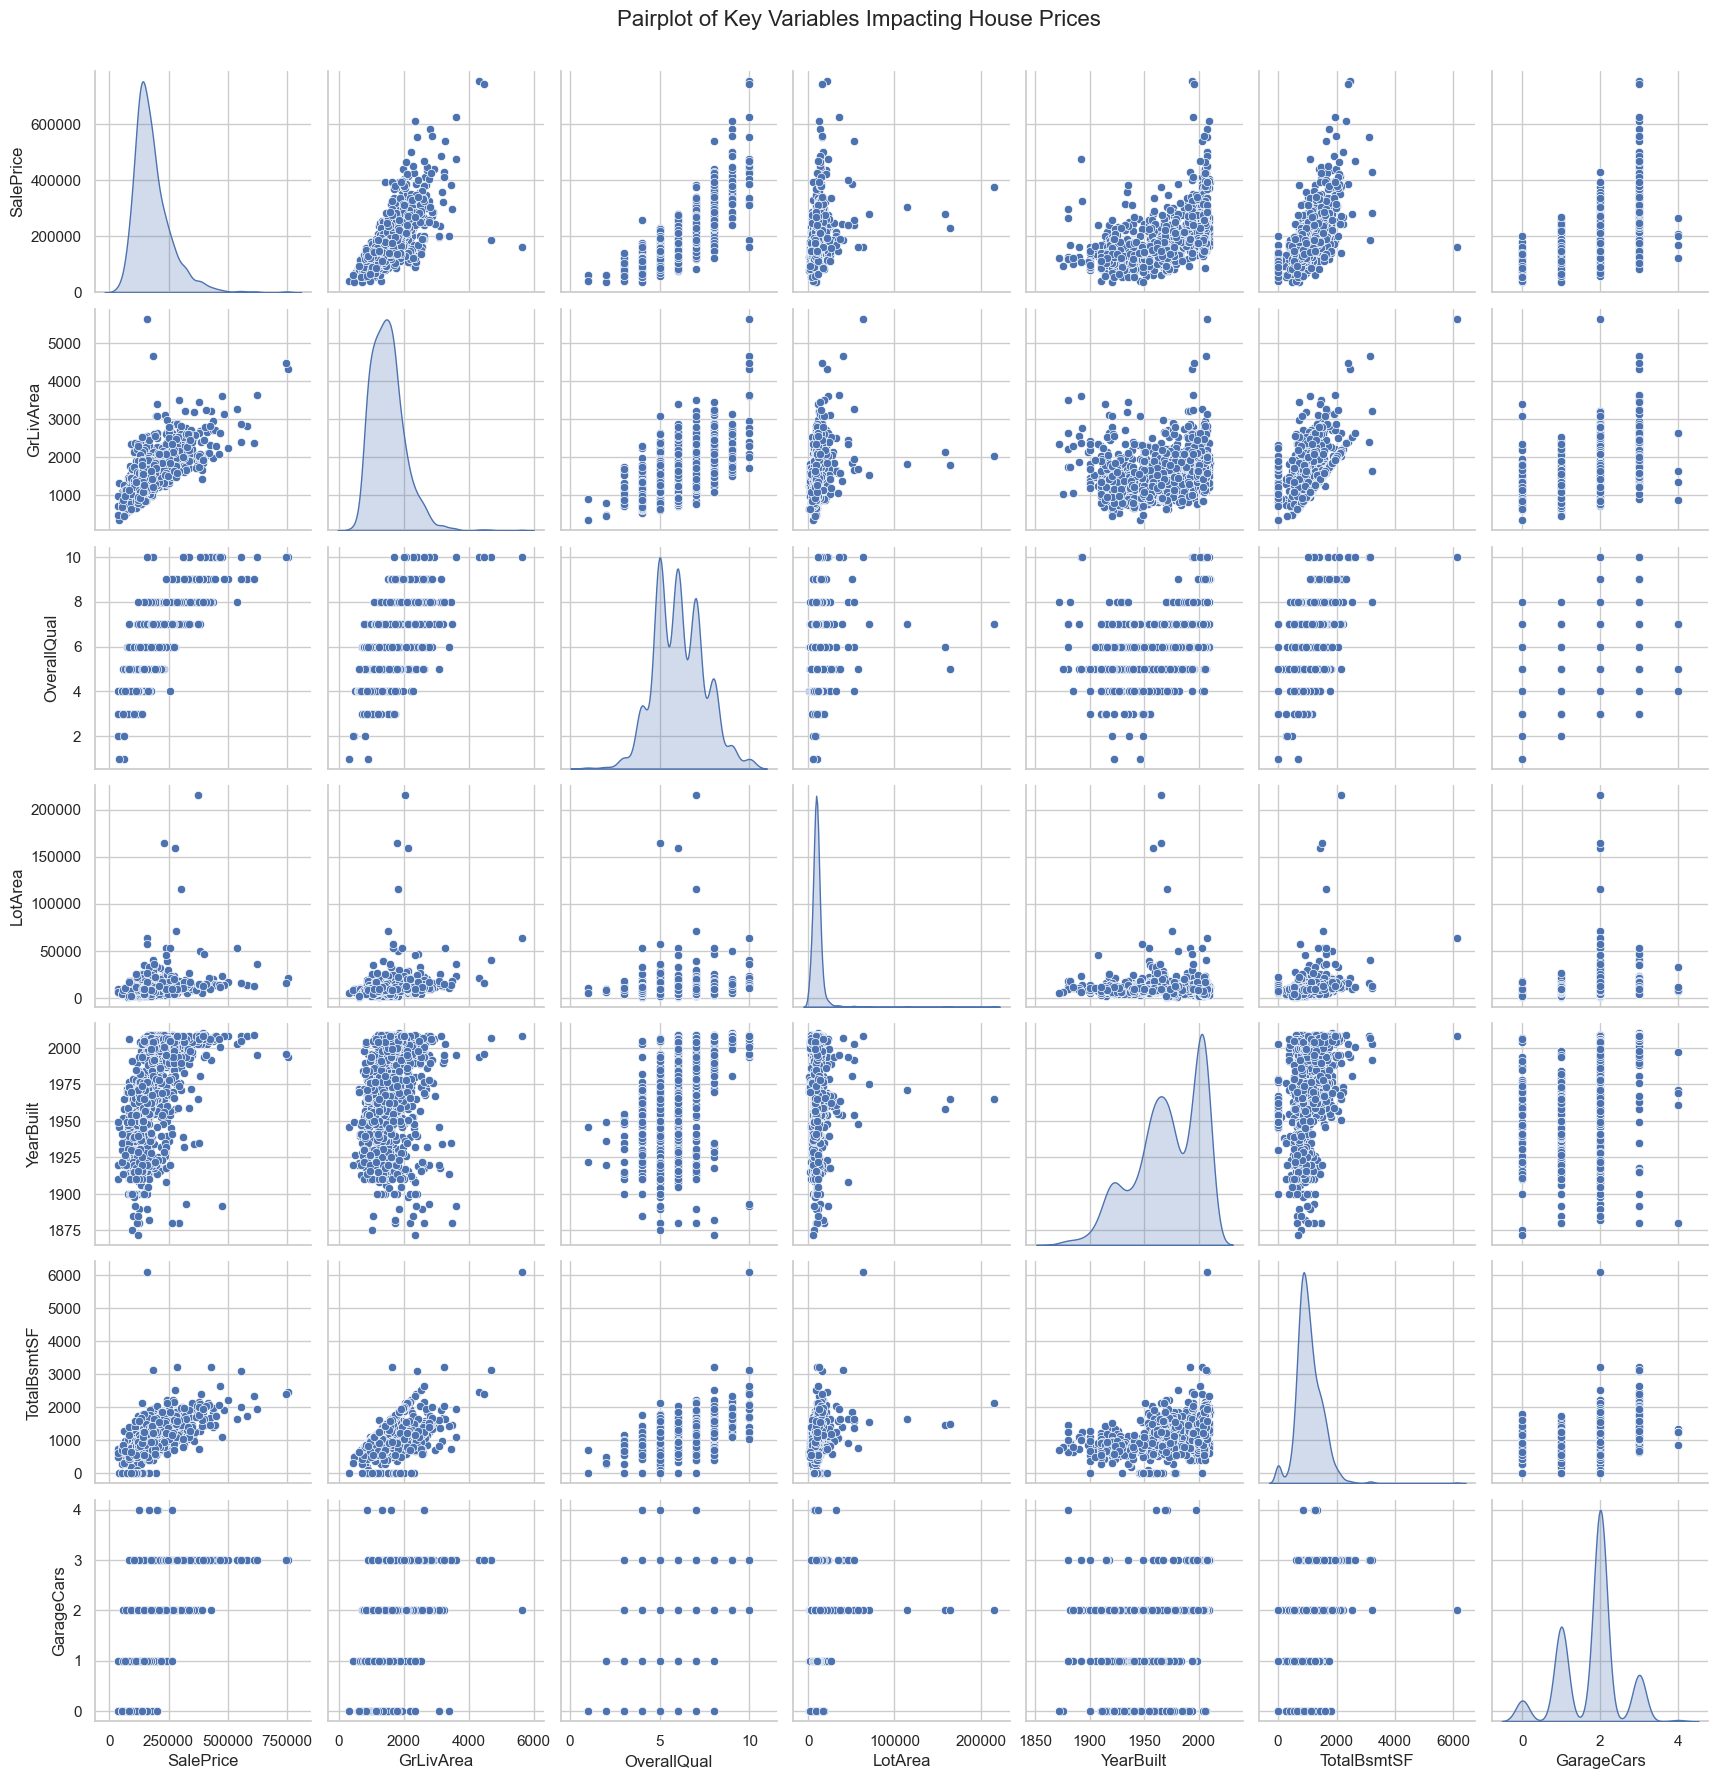

In [16]:
# Pairplot for selected variables
sns.pairplot(filtered_data, diag_kind='kde')
plt.suptitle('Pairplot of Key Variables Impacting House Prices', y=1.02, fontsize=16)
plt.show()

# Insights on Multivariate Analysis:
    The pairplot is revealing the relationships among key variables, 
    particularly highlighting the impact of living area and overall quality on sale prices.

# 5. Feature Engineering:

In [19]:
import pandas as pd

# 1. Total Living Area
housing_data['Total_Living_Area'] = (housing_data['1stFlrSF'] + 
                                      housing_data['2ndFlrSF'] + 
                                      housing_data['TotalBsmtSF'])

# 2. Total Bathrooms
housing_data['Total_Bathrooms'] = (housing_data['FullBath'] + 
                                    housing_data['BsmtFullBath'] + 
                                    0.5 * housing_data['HalfBath'] + 
                                    0.5 * housing_data['BsmtHalfBath'])

# 3. Property Age
housing_data['Property_Age'] = 2024 - housing_data['YearBuilt']

# 4. High Quality Indicator
housing_data['High_Quality'] = (housing_data['OverallQual'] > 7).astype(int)

# 5. Price per Square Foot
housing_data['Price_per_sqft'] = housing_data['SalePrice'] / housing_data['GrLivArea']

# 6. Year Built Age
housing_data['Year_Built_Age'] = 2024 - housing_data['YearBuilt']

# Display the new features
housing_data[['SalePrice', 'GrLivArea', 'Price_per_sqft', 'Year_Built_Age', 
                    'Total_Living_Area', 'Total_Bathrooms', 'Property_Age', 'High_Quality']].head()

,SalePrice,GrLivArea,Price_per_sqft,Year_Built_Age,Total_Living_Area,Total_Bathrooms,Property_Age,High_Quality
0,208500,1710,121.929825,21,2566,3.5,21,0
1,181500,1262,143.819334,48,2524,2.5,48,0
2,223500,1786,125.139978,23,2706,3.5,23,0
3,140000,1717,81.537566,109,2473,2.0,109,0
4,250000,2198,113.739763,24,3343,3.5,24,1


# 6. Outlier Detection After Feature Engineering:

In [21]:
# Numerical Columns available
numerical_features = housing_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 'Total_Living_Area', 'Total_Bathrooms', 'Property_Age', 'High_Quality', 'Price_per_sqft', 'Year_Built_Age']


In [22]:
# Identifying outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Count of outliers per feature
outlier_counts = {feature: len(identify_outliers_iqr(housing_data, feature)) for feature in numerical_features}

print("Count of outliers per feature (IQR):")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")

Count of outliers per feature (IQR):
LotFrontage: 16
LotArea: 69
OverallQual: 2
OverallCond: 125
YearBuilt: 7
YearRemodAdd: 0
MasVnrArea: 98
BsmtFinSF1: 7
BsmtFinSF2: 167
BsmtUnfSF: 29
TotalBsmtSF: 61
1stFlrSF: 20
2ndFlrSF: 2
LowQualFinSF: 26
GrLivArea: 31
BsmtFullBath: 1
BsmtHalfBath: 82
FullBath: 0
HalfBath: 0
BedroomAbvGr: 35
KitchenAbvGr: 68
TotRmsAbvGrd: 30
Fireplaces: 5
GarageYrBlt: 0
GarageCars: 5
GarageArea: 21
WoodDeckSF: 32
OpenPorchSF: 77
EnclosedPorch: 208
3SsnPorch: 24
ScreenPorch: 116
PoolArea: 7
MiscVal: 52
YrSold: 0
SalePrice: 61
Total_Living_Area: 25
Total_Bathrooms: 394
Property_Age: 7
High_Quality: 229
Price_per_sqft: 25
Year_Built_Age: 7


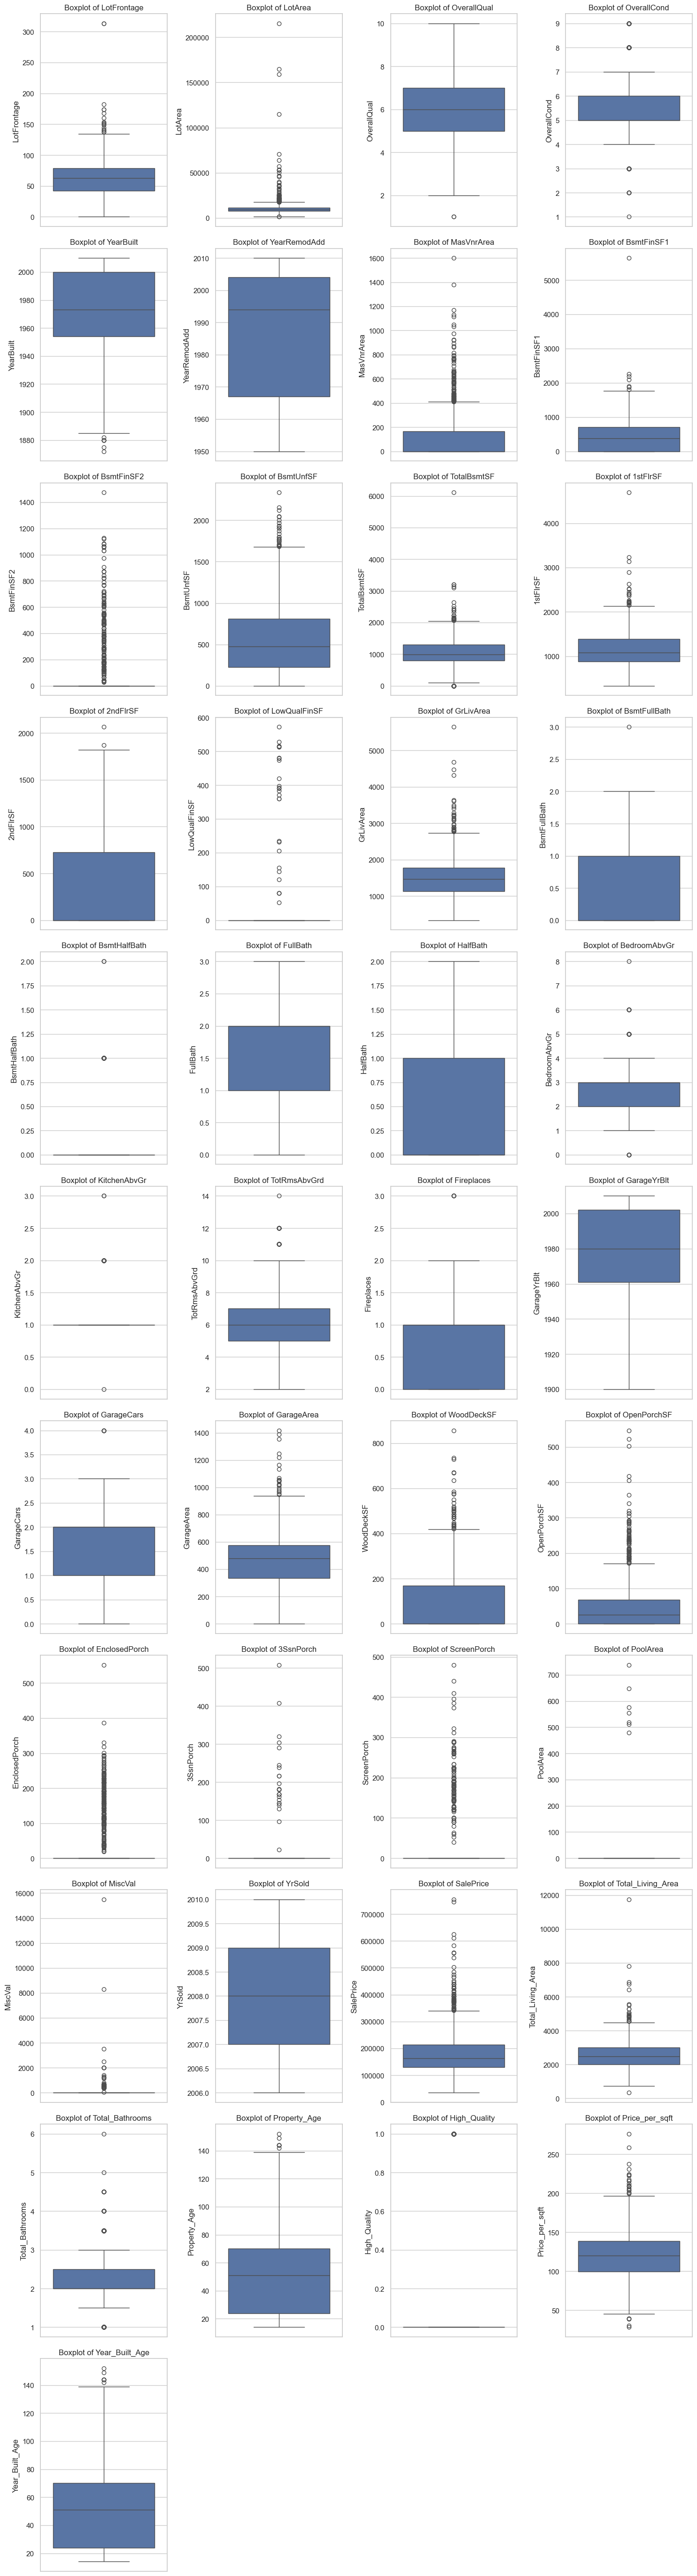

In [23]:
# Visualization of Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of features
num_features = len(numerical_features)
cols = 4
rows = math.ceil(num_features / cols)

for i in range(0, num_features, cols * rows):
    plt.figure(figsize=(15, 5 * rows))
    for j in range(cols * rows):
        if i + j < num_features:
            feature = numerical_features[i + j]
            plt.subplot(rows, cols, j + 1)
            sns.boxplot(data=housing_data, y=feature)
            plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

# 7. Handling Outliers in the Dataset:

In [25]:
import pandas as pd
import numpy as np

# Function to count outliers based on IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    
    return outliers_count

# Capping outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Function to replace outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    
    # Replace outliers with median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    return df

# Creating a copy of the original DataFrame to clean
cleaned_data = housing_data.copy()

# List all features to check for outliers
features_to_check = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                     'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                     'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                     'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 
                     'Total_Living_Area', 'Total_Bathrooms', 'Property_Age', 'High_Quality', 
                     'Price_per_sqft', 'Year_Built_Age']

# Handle outliers for all features
for feature in features_to_check:
    cleaned_data = cap_outliers(cleaned_data, feature)  # Cap outliers
    outlier_count = count_outliers_iqr(cleaned_data, feature)
    
    if outlier_count > 5:  # If still many outliers, replace with median
        cleaned_data = replace_outliers_with_median(cleaned_data, feature)

# Displaying the shape of the original and cleaned data
print("\nOriginal data shape:", housing_data.shape)
print("Cleaned data shape:", cleaned_data.shape)

# Count outliers again to check after handling
outliers_count_dict = {}
for feature in features_to_check:
    outliers_count_dict[feature] = count_outliers_iqr(cleaned_data, feature)

# Display the outliers count for each feature after handling
print("\nOutliers count after handling:")
for feature, count in outliers_count_dict.items():
    print(f"Outliers count in {feature} after handling: {count}")


Original data shape: (1460, 84)
Cleaned data shape: (1460, 84)

Outliers count after handling:
Outliers count in LotFrontage after handling: 0
Outliers count in LotArea after handling: 0
Outliers count in OverallQual after handling: 0
Outliers count in OverallCond after handling: 0
Outliers count in YearBuilt after handling: 0
Outliers count in YearRemodAdd after handling: 0
Outliers count in MasVnrArea after handling: 0
Outliers count in BsmtFinSF1 after handling: 0
Outliers count in BsmtFinSF2 after handling: 0
Outliers count in BsmtUnfSF after handling: 0
Outliers count in TotalBsmtSF after handling: 0
Outliers count in 1stFlrSF after handling: 0
Outliers count in 2ndFlrSF after handling: 0
Outliers count in LowQualFinSF after handling: 0
Outliers count in GrLivArea after handling: 0
Outliers count in BsmtFullBath after handling: 0
Outliers count in BsmtHalfBath after handling: 0
Outliers count in FullBath after handling: 0
Outliers count in HalfBath after handling: 0
Outliers coun

# Insights on Handling Outliers:
    Capping Outliers: I've used cap_outliers function to limit the extreme values instead of removing them.
    Replacement: After capping, if there are still many outliers, I've replaced those values with the median.

   This has avoided aggressive removal of rows, which also helped me to retain more data.

# 8. Feature Engineering and Size Impact:

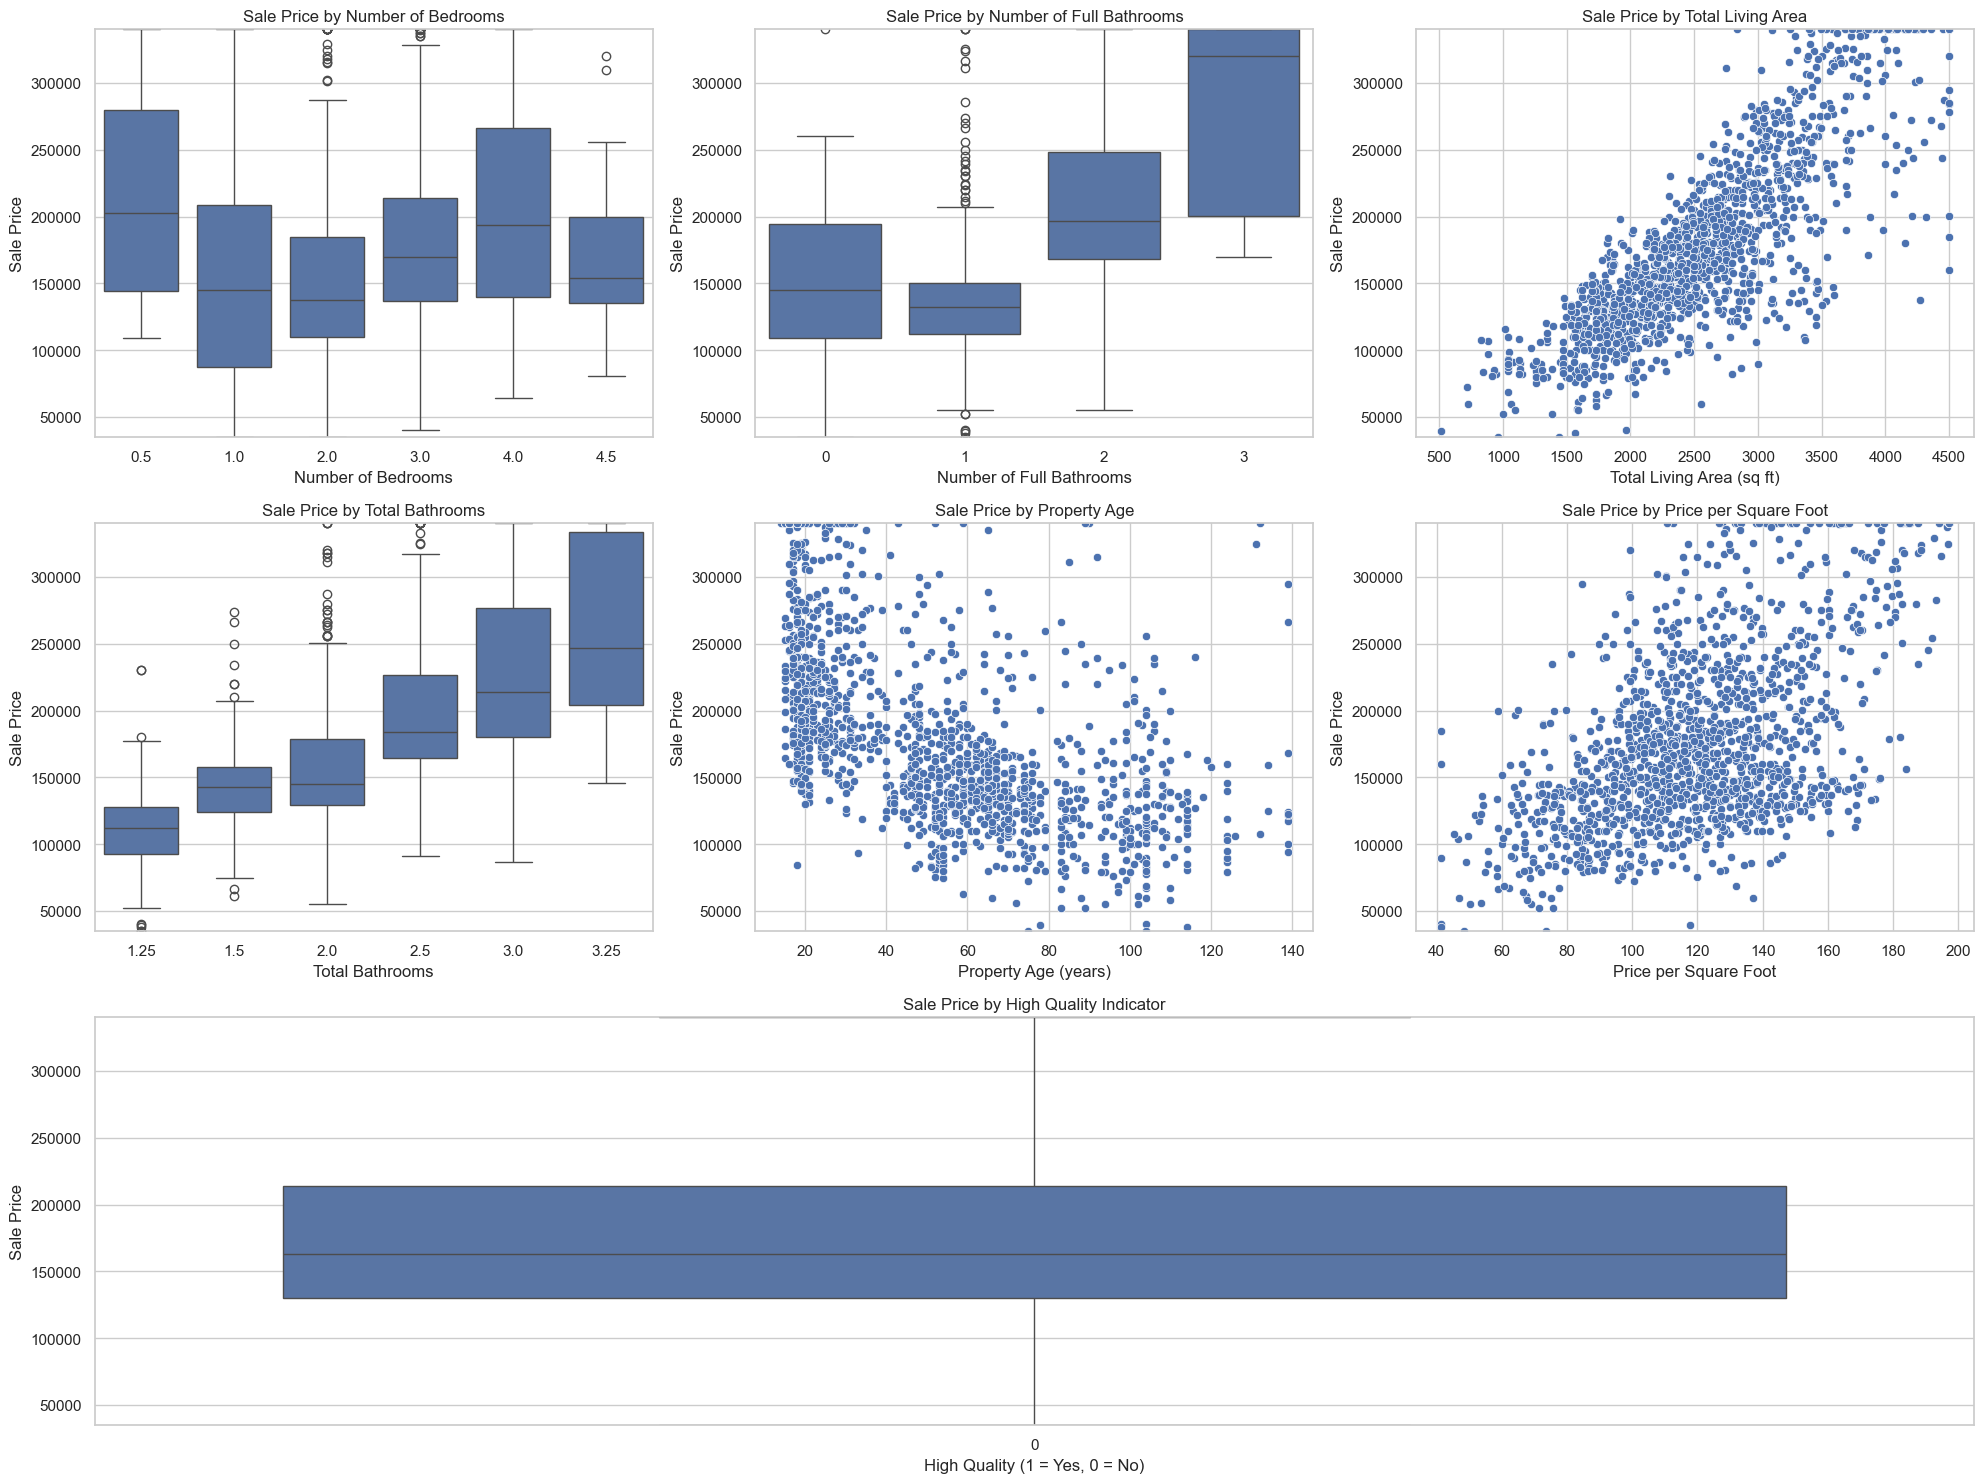

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set Seaborn style
sns.set(style='whitegrid')

# Created a figure with GridSpec
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 3)

# y-axis limits based on cleaned data
lower_limit = cleaned_data['SalePrice'].min()  # Minimum Sale Price
upper_limit = cleaned_data['SalePrice'].max()  # Maximum Sale Price

# Sale Price by Number of Bedrooms
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=cleaned_data, x='BedroomAbvGr', y='SalePrice', ax=ax1)
ax1.set_title('Sale Price by Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Sale Price')
ax1.set_ylim(lower_limit, upper_limit)

# Sale Price by Number of Full Bathrooms
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=cleaned_data, x='FullBath', y='SalePrice', ax=ax2)
ax2.set_title('Sale Price by Number of Full Bathrooms')
ax2.set_xlabel('Number of Full Bathrooms')
ax2.set_ylabel('Sale Price')
ax2.set_ylim(lower_limit, upper_limit)

# Sale Price by Total Living Area
ax3 = fig.add_subplot(gs[0, 2])
sns.scatterplot(data=cleaned_data, x='Total_Living_Area', y='SalePrice', ax=ax3)
ax3.set_title('Sale Price by Total Living Area')
ax3.set_xlabel('Total Living Area (sq ft)')
ax3.set_ylabel('Sale Price')
ax3.set_ylim(lower_limit, upper_limit)

# Sale Price by Total Bathrooms
ax4 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=cleaned_data, x='Total_Bathrooms', y='SalePrice', ax=ax4)
ax4.set_title('Sale Price by Total Bathrooms')
ax4.set_xlabel('Total Bathrooms')
ax4.set_ylabel('Sale Price')
ax4.set_ylim(lower_limit, upper_limit)

# Sale Price by Property Age
ax5 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=cleaned_data, x='Property_Age', y='SalePrice', ax=ax5)
ax5.set_title('Sale Price by Property Age')
ax5.set_xlabel('Property Age (years)')
ax5.set_ylabel('Sale Price')
ax5.set_ylim(lower_limit, upper_limit)

# Sale Price by Price per Square Foot
ax6 = fig.add_subplot(gs[1, 2])
sns.scatterplot(data=cleaned_data, x='Price_per_sqft', y='SalePrice', ax=ax6)
ax6.set_title('Sale Price by Price per Square Foot')
ax6.set_xlabel('Price per Square Foot')
ax6.set_ylabel('Sale Price')
ax6.set_ylim(lower_limit, upper_limit)

# Sale Price by High Quality Indicator
ax7 = fig.add_subplot(gs[2, :])
sns.boxplot(data=cleaned_data, x='High_Quality', y='SalePrice', ax=ax7)
ax7.set_title('Sale Price by High Quality Indicator')
ax7.set_xlabel('High Quality (1 = Yes, 0 = No)')
ax7.set_ylabel('Sale Price')
ax7.set_ylim(lower_limit, upper_limit)

plt.tight_layout()
plt.show()

# 7. Market Trends and Historical Pricing:

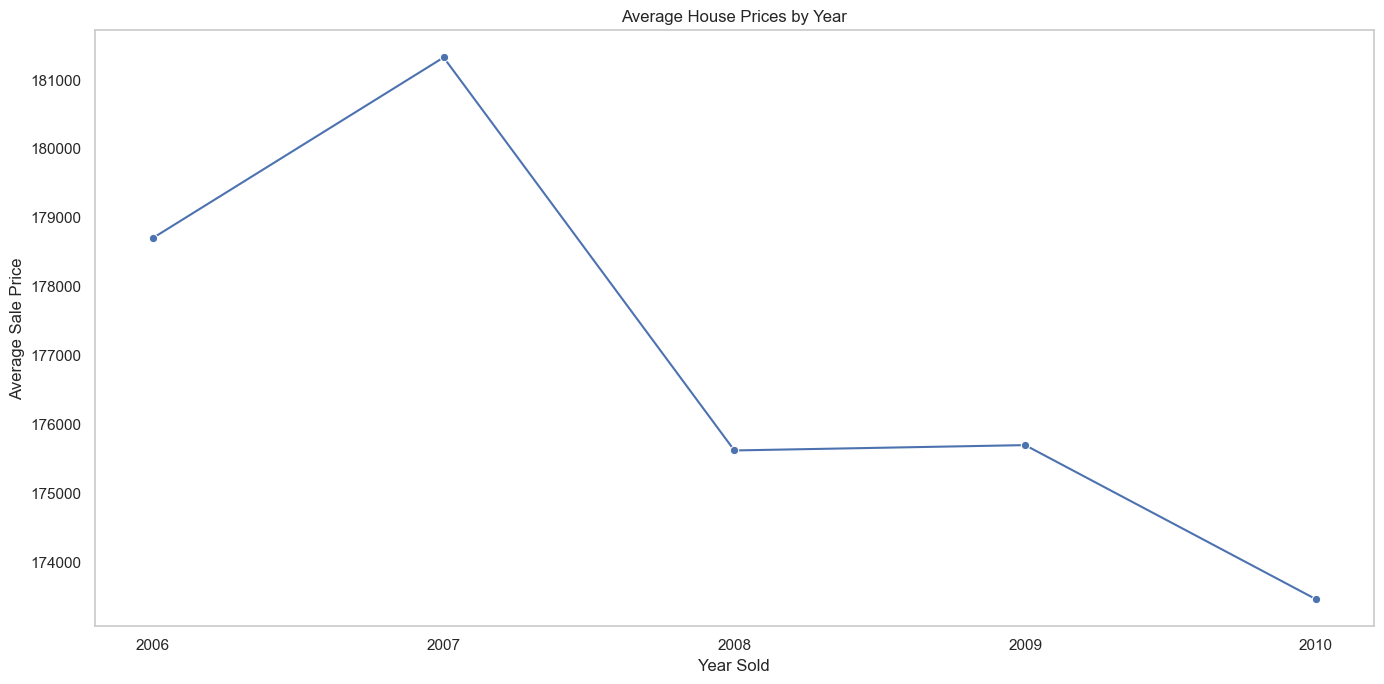

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sale prices by year
yearly_prices = cleaned_data.groupby('YrSold')['SalePrice'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_prices, x='YrSold', y='SalePrice', marker='o')
plt.title('Average House Prices by Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.xticks(yearly_prices['YrSold'])
plt.grid()
plt.tight_layout()
plt.show()

# 8. Customer Preferences and Amenities:

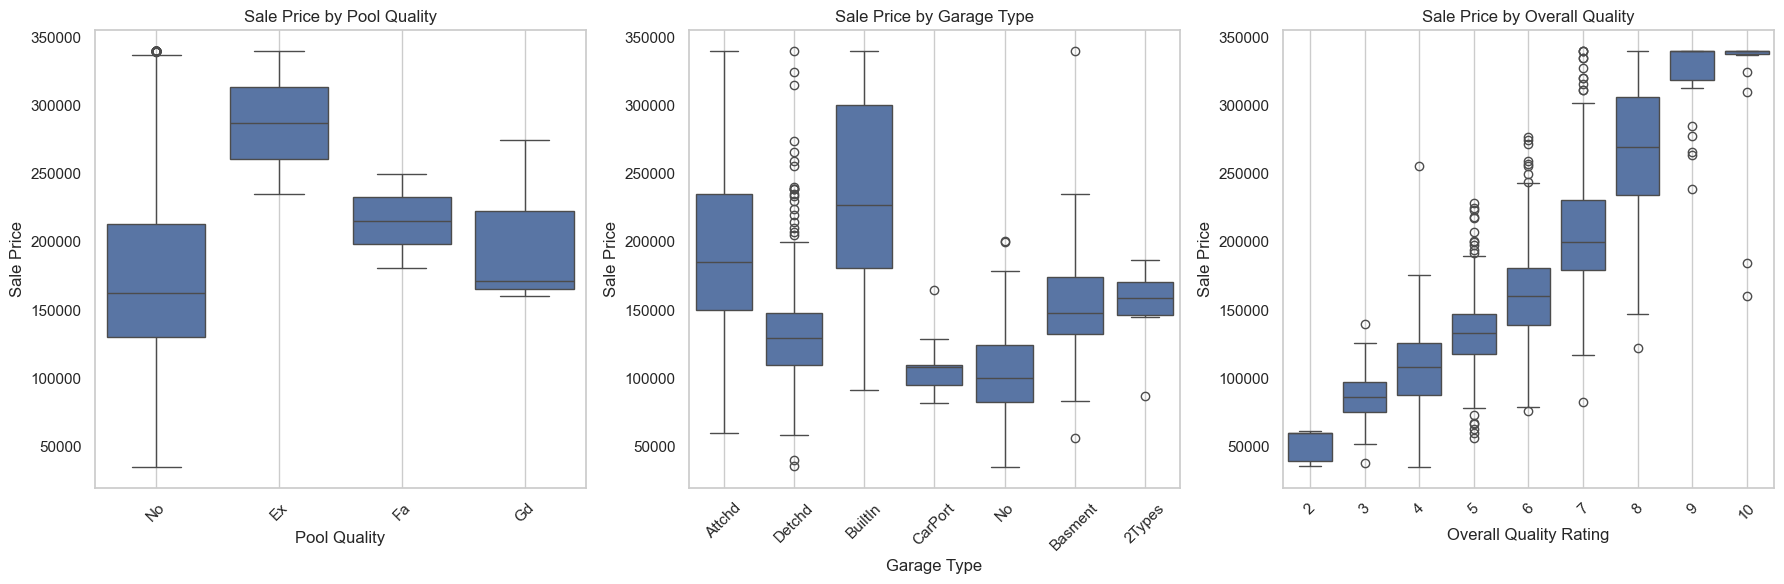

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-row, 3-column subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Impact of Swimming Pool on Sale Price
sns.boxplot(data=cleaned_data, x='PoolQC', y='SalePrice', ax=axes[0])
axes[0].set_title('Sale Price by Pool Quality')
axes[0].set_xlabel('Pool Quality')
axes[0].set_ylabel('Sale Price')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid()

# Impact of Garage on Sale Price
sns.boxplot(data=cleaned_data, x='GarageType', y='SalePrice', ax=axes[1])
axes[1].set_title('Sale Price by Garage Type')
axes[1].set_xlabel('Garage Type')
axes[1].set_ylabel('Sale Price')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid()

# Impact of Overall Quality on Sale Price
sns.boxplot(data=cleaned_data, x='OverallQual', y='SalePrice', ax=axes[2])
axes[2].set_title('Sale Price by Overall Quality')
axes[2].set_xlabel('Overall Quality Rating')
axes[2].set_ylabel('Sale Price')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid()

plt.tight_layout()
plt.show()

Average Sale Price by PoolQC:


PoolQC
Ex    287518.750000
Fa    215500.000000
Gd    201990.000000
No    177076.408121
Name: SalePrice, dtype: float64



Average Sale Price by GarageType:


GarageType
2Types     151283.333333
Attchd     198680.067816
Basment    159567.394737
BuiltIn    238593.323864
CarPort    109962.111111
Detchd     133742.422481
No         103317.283951
Name: SalePrice, dtype: float64



Average Sale Price by FireplaceQu:


FireplaceQu
Ex    294097.541667
Fa    167298.484848
Gd    218106.526316
No    141327.706522
Po    129764.150000
TA    202341.715655
Name: SalePrice, dtype: float64



Average Sale Price by BsmtQual:


BsmtQual
Ex    291029.326446
Fa    115692.028571
Gd    201543.535599
No    105652.891892
TA    140488.747304
Name: SalePrice, dtype: float64

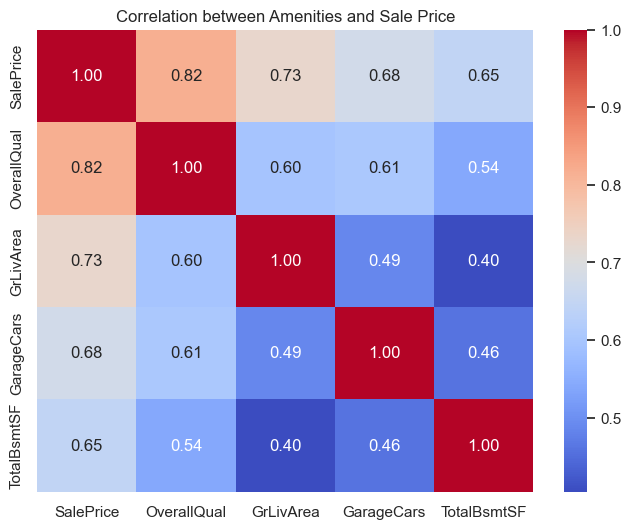

In [33]:
# Correlations between amenities and sale price
amenities = ['PoolQC', 'GarageType', 'FireplaceQu', 'BsmtQual']
for amenity in amenities:
    # Mean sale price for each level of the amenity
    print(f"Average Sale Price by {amenity}:")
    display(cleaned_data.groupby(amenity)['SalePrice'].mean())
    print("\n")

# Heatmap of correlations with SalePrice
amenity_features = cleaned_data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
correlation_matrix = amenity_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Amenities and Sale Price')
plt.show()

# Summary of Exploratory Analysis

This exploratory analysis provided a clear picture of the main factors affecting real estate prices. By examining relationships between property prices and features like location, lot size, age, and quality, I identified key trends and insights. Visualizations showed that certain features, such as overall property quality and larger lot area, tend to correlate with higher prices, helping to pinpoint what drives value in the real estate market.

During the analysis, I faced challenges with missing data, especially in columns with extensive gaps. To address this, I carefully chose which columns to remove and filled essential gaps with median or mode values to keep the data as accurate as possible. Additionally, there were outliers in the data, which needed careful handling to ensure they didn't distort the insights.

Overall, this analysis provided a strong foundation for future modeling by giving me a structured dataset and a solid understanding of which features are most relevant to real estate pricing.